In [227]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

df = pd.read_csv('kc_house_data.csv')

In [228]:
df.drop(columns=['date'], inplace=True)

In [229]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


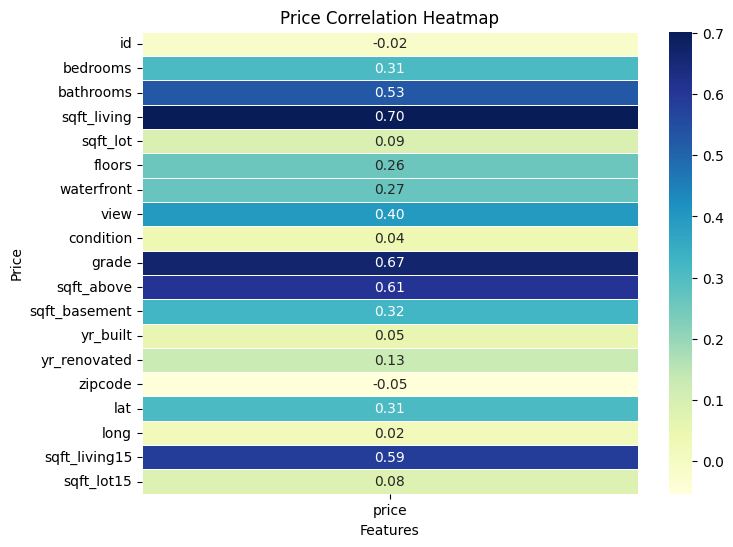

In [230]:
target = 'price'

#Gunakan correlation heatmap untuk liat hubungannya, drop kolom date dulu karena bentuknya object
# corr = df.drop(columns=['date'], axis=1).corr()
corr_price = corr[[target]].drop([target])

#buat canvasnya
plt.figure(figsize=(8, 6))

#buat heatmapnya
sns.heatmap(corr_price, annot=True, cmap='YlGnBu', fmt='.2f', linewidth=.5)

#Atur keterangan grafiknya
plt.title('Price Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Price')
plt.show()

In [231]:
#df.drop(columns=['id'], inplace=True)

In [232]:
for column in df.columns:
    proportion_of_nas = (sum(df[column].isnull())/len(df[column])) * 100 
    print(column, proportion_of_nas)

id 0.0
price 0.0
bedrooms 0.0
bathrooms 0.0
sqft_living 0.0
sqft_lot 0.0
floors 0.0
waterfront 0.0
view 0.0
condition 0.0
grade 0.0
sqft_above 0.0
sqft_basement 0.0
yr_built 0.0
yr_renovated 0.0
zipcode 0.0
lat 0.0
long 0.0
sqft_living15 0.0
sqft_lot15 0.0


In [233]:
selected_feature = ['grade','sqft_living15','sqft_living','sqft_above','bathrooms','view','sqft_basement','lat','waterfront','bedrooms','floors','zipcode']

x = df[selected_feature]
y = df['price']

In [234]:
# split data train test dengan rasio 70:30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 158)

In [235]:
df_train = pd.concat([x_train, y_train], axis = 1)
df_test = pd.concat([x_test, y_test], axis = 1)

In [236]:
df['price_normalized'] = (df['price'] - df['price'].min()) / (df['price'].max() - df['price'].min())

In [237]:
#Untuk menghasilkan error yang lebih kecil
#model = RandomForestRegressor()
#model.fit(x_train, y_train)
#y_pred = model.predict(x_test)

In [238]:
# evaluasi model
def calculate_error(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    print('MSE :', mse)
    print('RMSE : ', rmse)
    print('r2 : ', r2)

In [239]:
model = LinearRegression()

model.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)

In [240]:
calculate_error(y_test, y_pred)

MSE : 39736739492.03885
RMSE :  199340.76224404995
r2 :  0.6678645218546561


c:\Users\natan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
